In [1]:
import sqlite3
import pandas as pd
connection = sqlite3.connect("libary.db")
cursor = connection.cursor()


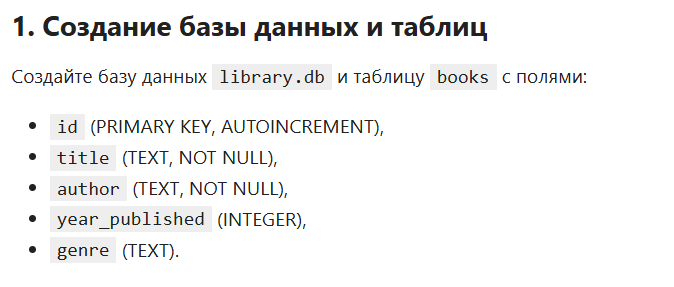

In [2]:
create_table_query = '''
CREATE TABLE IF NOT EXISTS books (
id INTEGER PRIMARY KEY AUTOINCREMENT,
title TEXT NOT NULL,
author TEXT NOT NULL,
year_published INTEGER,
genre TEXT
)
'''

cursor.execute(create_table_query)

connection.commit()


In [3]:
query = "SELECT * FROM books"
table = pd.read_sql(query, connection)

table

,id,title,author,year_published,genre


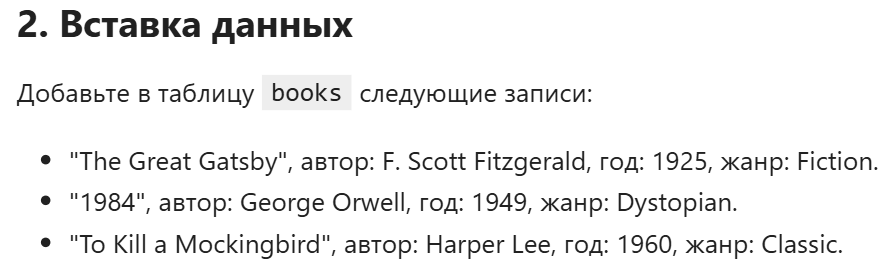

In [4]:
user_data1 = ("The Great Gatsby", "F. Scott Fitzgerald", 1925, "Fiction")
user_data2 = ("1984", "George Orwell", 1949, "Dystopian")
user_data3 = ("To Kill a Mockingbird", "Harper Lee", 1960, "Classic")

cursor.executemany('''INSERT INTO books (title, author, year_published, genre) VALUES(?, ?, ?, ?)''', [user_data1, user_data2, user_data3])
connection.commit()

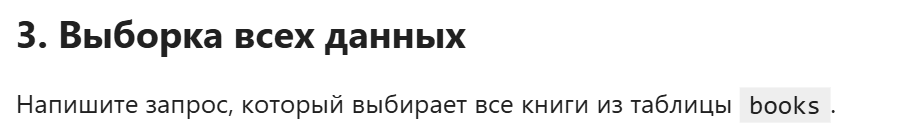

In [5]:
query = "SELECT * FROM books"
table = pd.read_sql(query, connection)
table

,id,title,author,year_published,genre
0,1,The Great Gatsby,F. Scott Fitzgerald,1925,Fiction
1,2,1984,George Orwell,1949,Dystopian
2,3,To Kill a Mockingbird,Harper Lee,1960,Classic


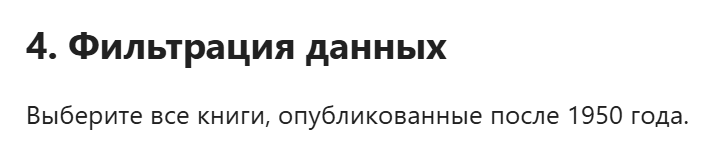

In [6]:
query = "SELECT * FROM books WHERE year_published > 1950"
table = pd.read_sql(query, connection)
table

,id,title,author,year_published,genre
0,3,To Kill a Mockingbird,Harper Lee,1960,Classic


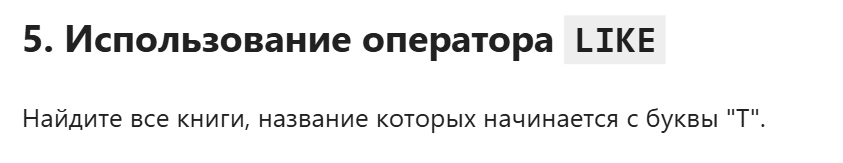

In [7]:
query = '''
SELECT * FROM books
WHERE title 
LIKE "T%"
'''
table = pd.read_sql(query, connection)
table

,id,title,author,year_published,genre
0,1,The Great Gatsby,F. Scott Fitzgerald,1925,Fiction
1,3,To Kill a Mockingbird,Harper Lee,1960,Classic


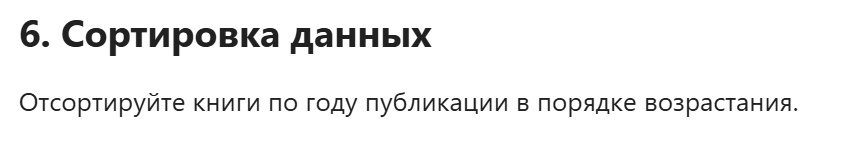

In [8]:
query = '''
SELECT * from books
ORDER BY year_published ASC
'''
table = pd.read_sql(query, connection)
table

,id,title,author,year_published,genre
0,1,The Great Gatsby,F. Scott Fitzgerald,1925,Fiction
1,2,1984,George Orwell,1949,Dystopian
2,3,To Kill a Mockingbird,Harper Lee,1960,Classic


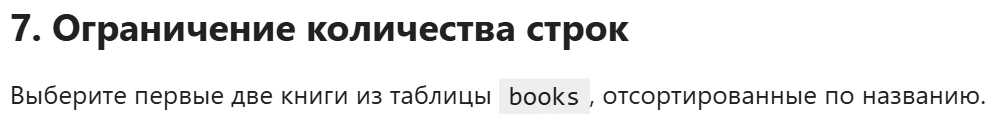

In [9]:
query = '''
SELECT * from books
ORDER BY title ASC
LIMIT 2
'''
table = pd.read_sql(query, connection)
table

,id,title,author,year_published,genre
0,2,1984,George Orwell,1949,Dystopian
1,1,The Great Gatsby,F. Scott Fitzgerald,1925,Fiction


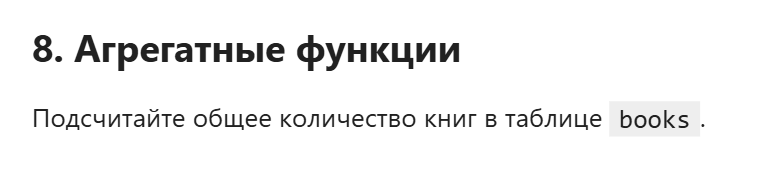

In [10]:
query = '''
SELECT COUNT(1) FROM books
'''
table = pd.read_sql(query, connection)
table

,COUNT(1)
0,3


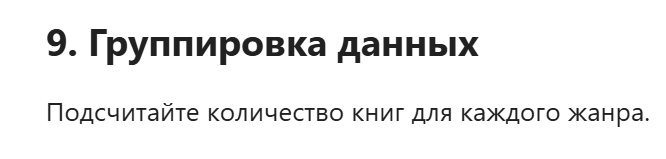

In [11]:
query = '''
SELECT genre, COUNT(1) as count FROM books
GROUP BY genre
'''
table = pd.read_sql(query, connection)
table


,genre,count
0,Classic,1
1,Dystopian,1
2,Fiction,1


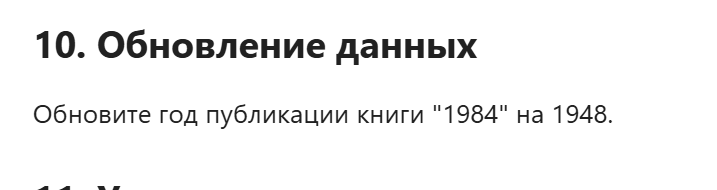

In [12]:
update_query = '''
UPDATE books
SET year_published = 1948
WHERE title = "1984"
'''
cursor.execute(update_query)
connection.commit()


query = "SELECT * FROM books"
table = pd.read_sql(query, connection)
table

,id,title,author,year_published,genre
0,1,The Great Gatsby,F. Scott Fitzgerald,1925,Fiction
1,2,1984,George Orwell,1948,Dystopian
2,3,To Kill a Mockingbird,Harper Lee,1960,Classic


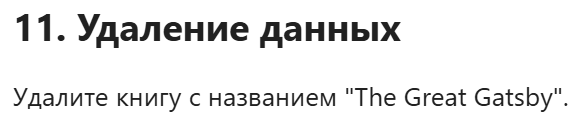

In [13]:
del_query = '''
DELETE FROM books
WHERE title = "The Great Gatsby"
'''

cursor.execute(del_query)
connection.commit()

query = "SELECT * FROM books"
table = pd.read_sql(query, connection)
table

,id,title,author,year_published,genre
0,2,1984,George Orwell,1948,Dystopian
1,3,To Kill a Mockingbird,Harper Lee,1960,Classic


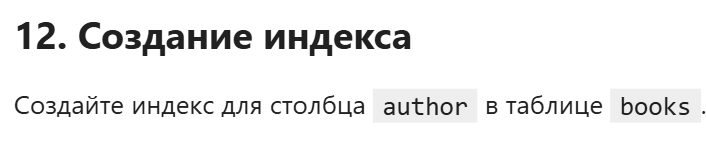

In [14]:
creaty_query = '''
CREATE INDEX IF NOT EXISTS idx_authors
ON books (author)
'''

cursor.execute(creaty_query)
connection.commit()

query = "SELECT * FROM books"
table = pd.read_sql(query, connection)
table

,id,title,author,year_published,genre
0,2,1984,George Orwell,1948,Dystopian
1,3,To Kill a Mockingbird,Harper Lee,1960,Classic


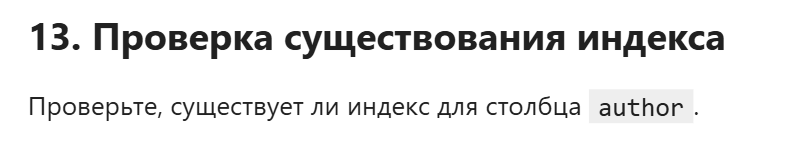

In [15]:
is_exist_query = '''
SELECT name FROM sqlite_master WHERE type='index' AND name='idx_authors'
'''

cursor.execute(is_exist_query)
connection.commit()

query = "SELECT * FROM books"
table = pd.read_sql(query, connection)
table

,id,title,author,year_published,genre
0,2,1984,George Orwell,1948,Dystopian
1,3,To Kill a Mockingbird,Harper Lee,1960,Classic


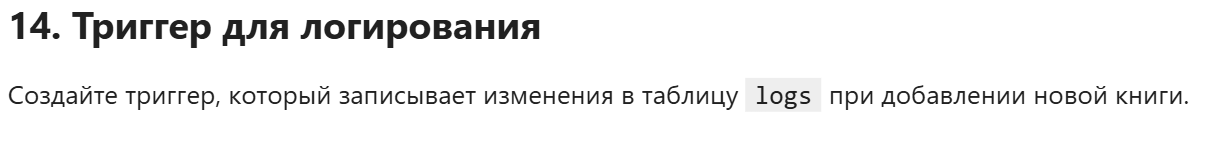

In [16]:
trigger_query = '''
CREATE TRIGGER IF NOT EXISTS logs_users_update
AFTER UPDATE ON books
FOR EACH ROW
BEGIN
    INSERT INTO logs (book_id, action)
    VALUES (OLD.id, 'UPDATE');
END;
'''

cursor.execute(trigger_query)
connection.commit()

query = "SELECT * FROM books"
table = pd.read_sql(query, connection)
table

,id,title,author,year_published,genre
0,2,1984,George Orwell,1948,Dystopian
1,3,To Kill a Mockingbird,Harper Lee,1960,Classic


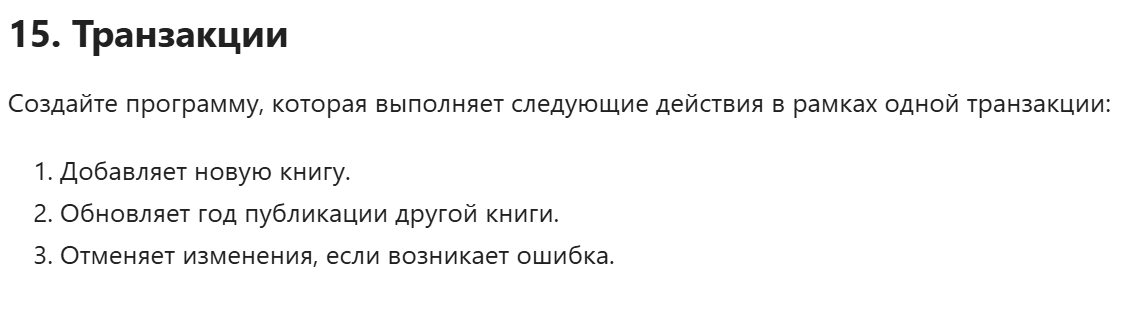

In [17]:
try:
    cursor.execute('BEGIN TRANSACTION')

    cursor.execute('''
    INSERT INTO books (title, author, year_published, genre)
    VALUES (?, ?, ?, ?);
    ''', ('Dead Souls', 'Gogol', 1842, 'Roman'))

    connection.commit()
    print("Транзакция успешно завершена.")
except Exception as e:
    connection.rollback()
    print(f"Ошибка: {e}. Изменения отменены.")

Транзакция успешно завершена.


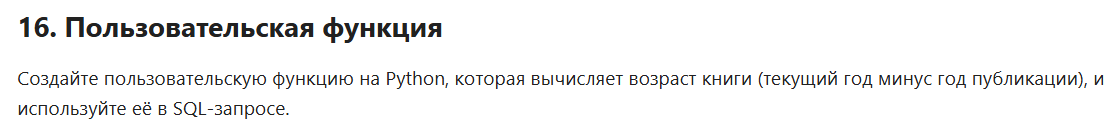

In [18]:
def process_data(year):
    return 2025 - year

connection.create_function('book_age', 1, process_data)
connection.commit()

query = "SELECT *, book_age(year_published) FROM books"
table = pd.read_sql(query, connection)
table

,id,title,author,year_published,genre,book_age(year_published)
0,2,1984,George Orwell,1948,Dystopian,77
1,3,To Kill a Mockingbird,Harper Lee,1960,Classic,65
2,4,Dead Souls,Gogol,1842,Roman,183


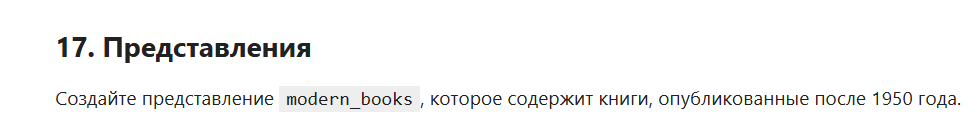

In [20]:
cursor.execute(''' 
CREATE VIEW IF NOT EXISTS modern_books AS
SELECT * FROM books WHERE year_published > 1950
''')
connection.commit()

query = "SELECT * FROM modern_books"
table = pd.read_sql(query, connection)
table

,id,title,author,year_published,genre
0,3,To Kill a Mockingbird,Harper Lee,1960,Classic


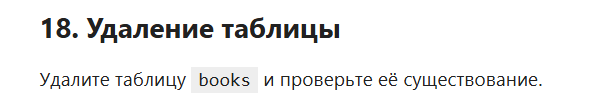

In [23]:
droptable_query = '''
DROP TABLE IF EXISTS books
'''
connection.commit()

cursor.execute(droptable_query)


table_query = '''SELECT * FROM books'''
cursor.execute(table_query)

OperationalError: no such table: books

In [24]:
cursor.execute(create_table_query)
connection.commit()

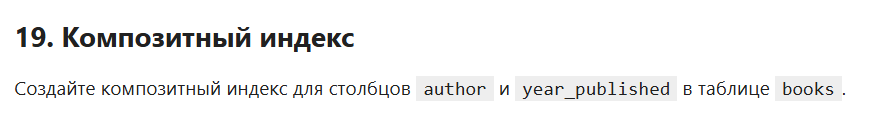

In [26]:
create_composite_index_query = '''
CREATE INDEX IF NOT EXISTS author_year_published_index
ON books (author, year_published)
'''

cursor.execute(create_composite_index_query)
connection.commit()


query = "SELECT * FROM modern_books"
table = pd.read_sql(query, connection)
table

,id,title,author,year_published,genre


In [ ]:
import os

try:
    cursor.close()
    connection.close()
    os.remove("libary.db")
    print("file libary.db deleted!")
except Exception as e:
    print(f"{e} file doesn't exist")

file ./libary.db deleted!
